In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [135]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.to_list()
cate_cols = df.select_dtypes(include='object').columns.tolist()

In [136]:
df[cate_cols].nunique()

Gender                            2
family_history_with_overweight    2
FAVC                              2
CAEC                              4
SMOKE                             2
SCC                               2
CALC                              4
MTRANS                            5
NObeyesdad                        7
dtype: int64

In [137]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

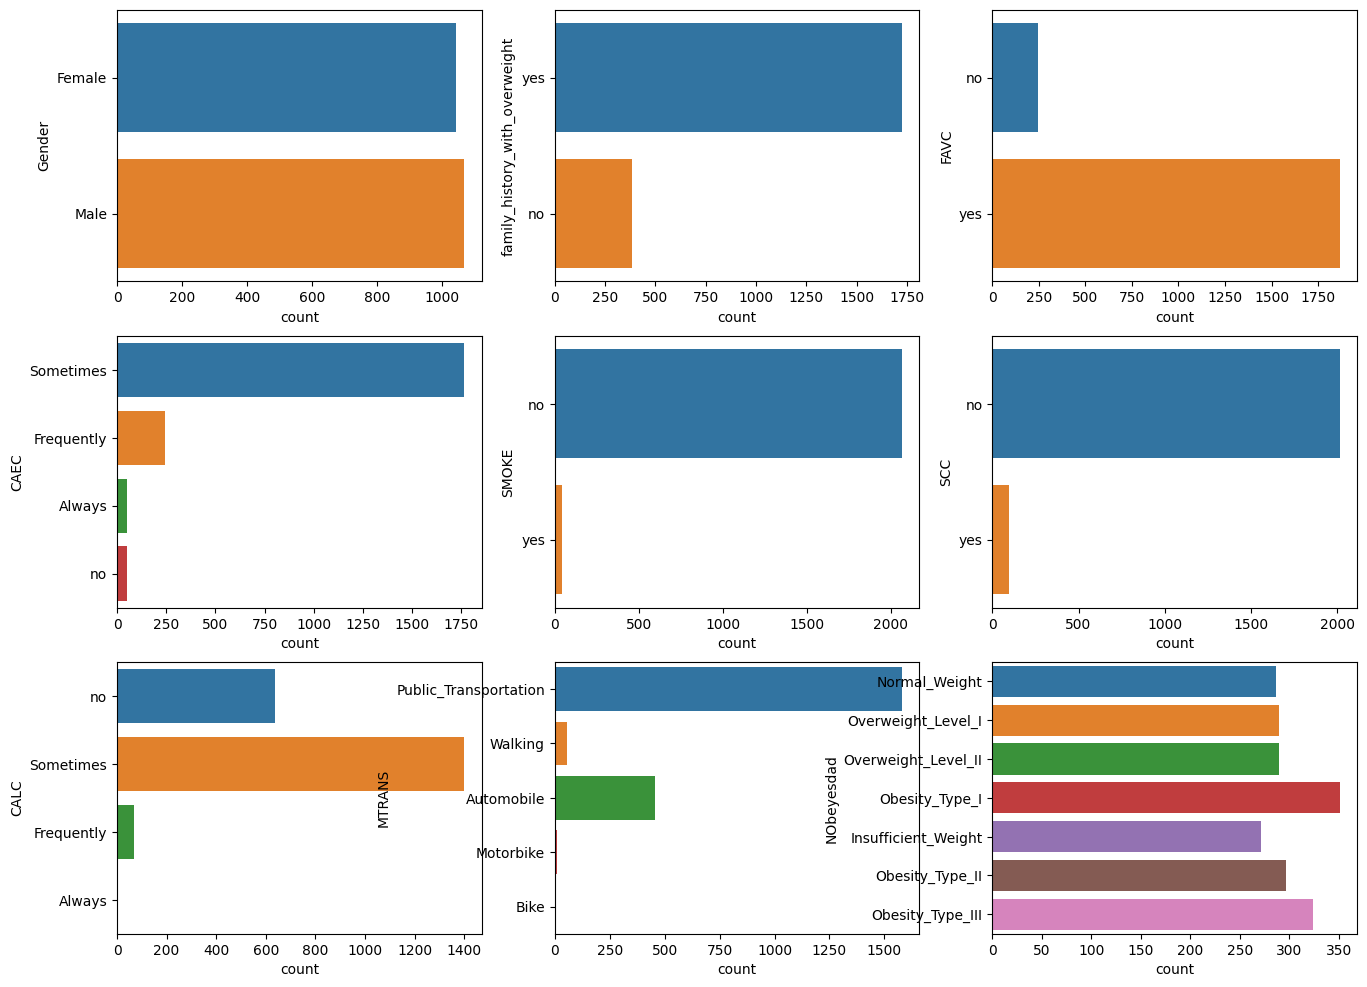

In [138]:
fig, axs = plt.subplots(3, 3, figsize=(16, 12))
axs = axs.flat
for i, col in enumerate(cate_cols):
    sns.countplot(df, y=col, ax=axs[i])
plt.show()

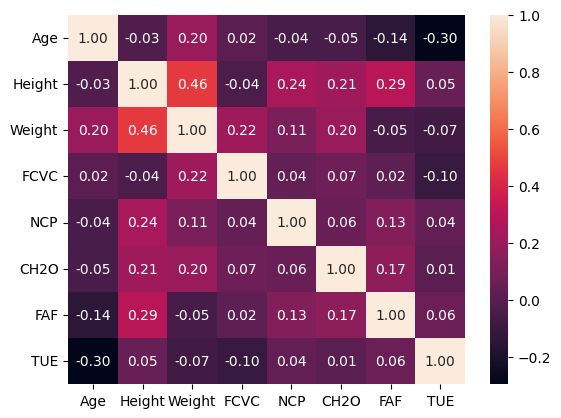

In [139]:
sns.heatmap(df[num_cols].corr(), fmt='.2f', annot=True)
plt.show()

In [140]:
X = df[cate_cols+num_cols].copy()

In [141]:
# from sklearn.model_selection import train_test_split
# X_train, X_test = train_test_split(X, test_size=0.2)

In [142]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

ST = StandardScaler()
OH = OneHotEncoder(handle_unknown='ignore')

processor = ColumnTransformer(transformers=[
    ('num', ST, num_cols),
    ('cat', OH, cate_cols)
])

In [143]:
# X_train = processor.fit_transform(X_train)
# X_test = processor.transform(X_test)
X = processor.fit_transform(X)

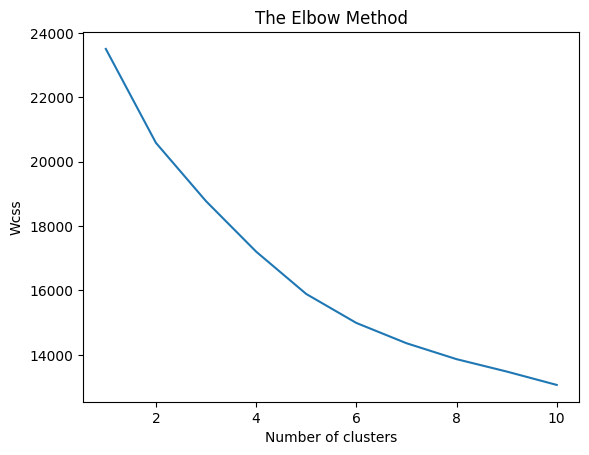

In [144]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')
plt.show()

In [145]:
kmeans = KMeans(n_clusters=3, random_state=42, init='k-means++', n_init=10)
y_kmeans = kmeans.fit_predict(X)

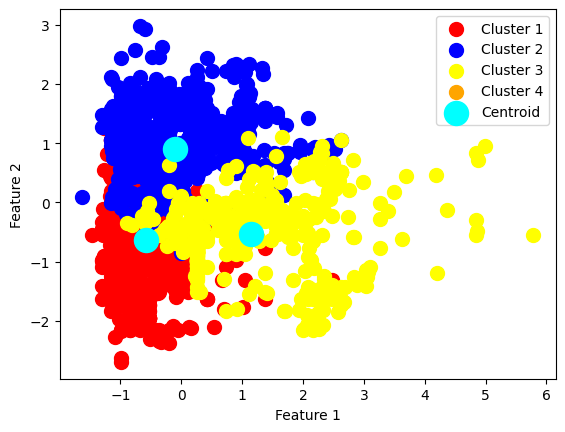

In [146]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, label='Cluster 1', c='red')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, label='Cluster 2', c='blue')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, label='Cluster 3', c='yellow')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, label='Cluster 4', c='orange')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='cyan', label='Centroid')
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()